# Importando librerias

In [1]:
import pandas as pd
import datetime
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio

# Limpiando
[Dataset](https://drive.google.com/file/d/15BMOwWdVQKsK8lBibax0_ks5K6HXxdFz/view?usp=sharing)

In [2]:
path = 'C:/Users/PC/Desktop/Proyectos Personales/Music/ny_phil.csv'
ny_phil = pd.read_csv(path)
ny_phil.head(2)

e:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Location,Time,Venue,eventType,id,composerName,conductorName,interval,movement,workTitle,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra
0,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic
1,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",NaN,NaN,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic


In [3]:
#Dado que no nos es relevante la columna 'inverval', la eliminamos
ny_phil.drop('interval', axis = 1, inplace = True)
ny_phil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806179 entries, 0 to 806178
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               806179 non-null  object 
 1   Location           806179 non-null  object 
 2   Time               806179 non-null  object 
 3   Venue              806179 non-null  object 
 4   eventType          806179 non-null  object 
 5   id                 806179 non-null  object 
 6   composerName       737731 non-null  object 
 7   conductorName      570894 non-null  object 
 8   movement           340598 non-null  object 
 9   workTitle          737731 non-null  object 
 10  soloistInstrument  779437 non-null  object 
 11  soloistName        780096 non-null  object 
 12  soloistRoles       779834 non-null  object 
 13  season             781218 non-null  object 
 14  programID          781218 non-null  float64
 15  orchestra          781218 non-null  object 
dtypes:

In [4]:
#Los compositores y directores con NaN los llenamos con un 'Desconocido'
#Haremos lo mismo con los titulos de las obras y las orquestas con NaN
to_unknown = ['composerName', 'conductorName', 'workTitle', 'orchestra']
ny_phil[to_unknown] = ny_phil[to_unknown].fillna('Unknown')

#Si la obra consta de un solo movimiento se llenara como 0
ny_phil['movement'] = ny_phil['movement'].fillna('0')

to_none = ['soloistInstrument', 'soloistName', 'soloistRoles']
#Si no hay solita entonces lo llenamos con None
ny_phil[to_none] = ny_phil[to_none].fillna('None')

#Finalmente vamos a eliminar aquellos conciertos sin ID
ny_phil.dropna(inplace = True)

ny_phil.head(2)

,Date,Location,Time,Venue,eventType,id,composerName,conductorName,movement,workTitle,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra
0,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic
1,1842-12-07T05:00:00Z,"Manhattan, NY",8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic


In [5]:
#Notamos que hay valores en la columna 'soloistInstrument' estan los valores ' ',
# 'Piano; Piano', 'Dancer;...', entonces vamos a eliminarlos 
ny_phil['soloistInstrument'].unique()

array(['Soprano', 'Piano', 'Violin', 'Viola', 'Cello', 'Contrabass',
       'Tenor', 'Flute', 'Clarinet', 'Bassoon', 'French Horn', 'None',
       'Oboe', 'Vocalist', 'Harp', 'Cornet', 'Alto', 'Bass',
       'Mens Chorus', 'Trumpet', 'Saxhorn', 'Womens Chorus', 'Baritone',
       'Chorus', 'Mezzo-Soprano', 'Organ', 'Trombone', 'Contralto',
       'Speaker', 'SATB Chorus', 'Narrator', 'Boys Choir', 'Reader',
       'Bass Clarinet', 'Ensemble', 'Other', 'Orchestra', 'Vocal Group',
       ' ', 'Elementary Chorus', 'Advanced Chorus', 'Piccolo',
       'Sing-Along', "Viola d'amore", 'English Horn', 'Harpsichord',
       'Dancer', 'Clavier', 'Viola tenore', 'Reciter',
       'Unspecified Voice', "Children's Chorus", 'Vocal Quartet',
       'Harmonium', 'String Quartet', 'Solo Voice', 'Duo-Art Piano',
       'Trombone Choir', 'Actor', 'Drum', 'Xylophone', 'Folk Singer',
       'Conductor', 'Treble [Boy soprano]', 'Tuba', 'Piano trio',
       'E-Flat Clarinet', 'Timpani', 'Percussion',
       

In [6]:
errors = [' ', 'Piano; Piano', 'Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Choreographer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Scenic Design',
       'Dancer; Choreographer',
       'Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer',
       'Dancer; Dancer; Choreographer; Choreographer',
       'Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Dancer; Choreographer; Dancer; Dancer']

ny_phil = ny_phil[~ny_phil['soloistInstrument'].isin(errors)]

## Transformamos las columnas

In [7]:
#Separamos el Estado de Location
state = ny_phil['Location'].str.split(', ', expand = True)
ny_phil['Location'] = state[0]
ny_phil['State'] = state[1]
ny_phil.head(2)

,Date,Location,Time,Venue,eventType,id,composerName,conductorName,movement,workTitle,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra,State
0,1842-12-07T05:00:00Z,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic,NY
1,1842-12-07T05:00:00Z,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic,NY


In [8]:
#Quitamos la hora de la columna 'Date'
ny_phil['Date'] =  ny_phil['Date'].str.split('T', expand = True)[0]
ny_phil.head(2)

,Date,Location,Time,Venue,eventType,id,composerName,conductorName,movement,workTitle,soloistInstrument,soloistName,soloistRoles,season,programID,orchestra,State
0,1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic,NY
1,1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic,NY


In [9]:
#Reescribimos los nombres de las columnas
ny_phil.columns = ny_phil.columns.str.capitalize()
ny_phil.head(2)

,Date,Location,Time,Venue,Eventtype,Id,Composername,Conductorname,Movement,Worktitle,Soloistinstrument,Soloistname,Soloistroles,Season,Programid,Orchestra,State
0,1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic,NY
1,1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic,NY


In [10]:
#Pasamos a category y a datetime
categories = ['Location', 'Venue', 'Eventtype', 'Composername', 'Conductorname', 'Soloistinstrument', 'Soloistname', 'Season', 'Orchestra']
ny_phil[categories] = ny_phil[categories].astype('category') 
ny_phil['Date'] = pd.to_datetime(ny_phil['Date'])

#Indicamos el indice para trabajar con mayor facilidad
ny_phil.index = ny_phil['Date']
ny_phil.drop('Date', axis = 1, inplace = True)
ny_phil.head(2)

,Location,Time,Venue,Eventtype,Id,Composername,Conductorname,Movement,Worktitle,Soloistinstrument,Soloistname,Soloistroles,Season,Programid,Orchestra,State
Date,,,,,,,,,,,,,,,,
1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Soprano,"Otto, Antoinette",S,1842-43,3853.0,New York Philharmonic,NY
1842-12-07,Manhattan,8:00PM,Apollo Rooms,Subscription Season,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli",0,"SYMPHONY NO. 5 IN C MINOR, OP.67",Piano,"Scharfenberg, William",A,1842-43,3853.0,New York Philharmonic,NY


# Compositores más tocados en el histórico

Para poder hacer el conteo hay que hacer algo importante

Por ejemplo, el Mesias de Handel lleva un coro y por cada integrante del coro se va a crear un nuevo registro ya que la parte de "solistas" va a ir cambiando por cada integrante pero el registro va a contener el mismo id del programa, por lo que si contaramos el numero de veces que Handel es tocado vamos a notar de que la cuenta es incorrecta, pues estariamos contanto que el Mesisas fue tocado una vez por cada integrante del coro. Es decir, si el coro tiene 100 integrantes entonces estarimos contando que el Mesisas si tocó 100 veces. Así, debemos de eliminar las columnas relacionadas a los solistas y posteriormente eliminar los registros duplicados

Además notamos que hay que eliminar la columna 'Movement' puesto que si una sinfonía tiene 4 movimientos entonces al momento de contar los registros nos va a aparecer que la sinfonía  fue tocada 4 veces, lo cual es incorrecto

In [11]:
#Dataset para poder contar los registros
unicos = ny_phil.copy()
unicos = unicos[['Location', 'Id', 'Composername', 'Conductorname', 'Worktitle', 'Season', 'Programid']]
unicos.drop_duplicates(inplace = True)
unicos.head(2)

,Location,Id,Composername,Conductorname,Worktitle,Season,Programid
Date,,,,,,,
1842-12-07,Manhattan,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Beethoven, Ludwig van","Hill, Ureli Corelli","SYMPHONY NO. 5 IN C MINOR, OP.67",1842-43,3853.0
1842-12-07,Manhattan,38e072a7-8fc9-4f9a-8eac-3957905c0002,"Weber, Carl Maria Von","Timm, Henry C.",OBERON,1842-43,3853.0


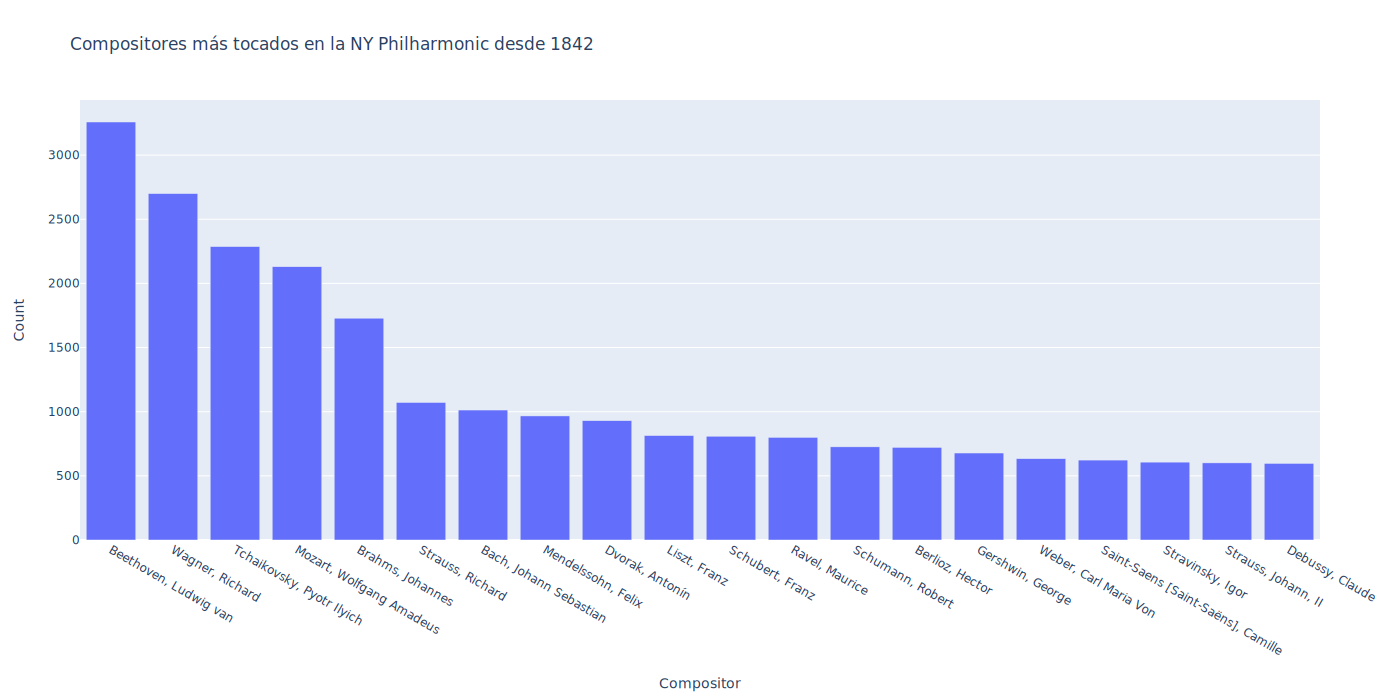

In [12]:
#Ahora si procedemos a hacer el conteo de los compositores mas tocados
#eliminamos los registros de 'Unknown' y de 'Traditional,'
compositores = unicos[~unicos['Composername'].isin(['Unknown', 'Traditional,'])]

#Agrupamos por nombre del compositor, contamos y ordenamos
compositores_top = compositores.groupby(by = 'Composername').agg({'Composername' : 'count'})
compositores_top.columns = ['Count']
compositores_top.sort_values('Count', ascending = False, inplace = True)
compositores_top.reset_index(inplace = True)

#Graficamos
labels1 = {'Composername' : 'Compositor', 'Location' : 'Acumulado'}
title1 = 'Compositores más tocados en la NY Philharmonic desde 1842'
fig = px.bar(compositores_top[:20], x = 'Composername', y = 'Count', title = title1, labels = labels1, width=1400, height=700)
fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer = 'svg') 


# Función para ver el núnero de obras ejecutadas por compositor en cada año

Dado que es interesante saber si hubo tendencias de cierto compositor/periodo musical, entonces pensé que es buena idea crear una función la cual tome como parametros un compositor y un rango de años y regrese un histograma de las obras tocadas por año de ese compositor

In [13]:
def hist_comp(compositor:str, inicio=1842, fin=2017):
        '''
        Funcion que regresa una grafica del numero de obras tocadas por
        el compositor dado durante los años especificados
        Entrada:
                compositor: Nombre del compositor
                inicio: Año desde el cual va a iniciar la grafica
                fin: Año en el cual va a termianr la grafica
        '''
        
        #Seleccionamos el compositor dado
        compositordf = unicos[unicos['Composername'].str.contains(compositor)]

        #Buscamos entre las fechas dadas
        compositordf = compositordf.loc[str(inicio):str(fin)]
        
        #Agrupamos por año y contamos el numero de apariciones
        compositordf =  compositordf.groupby(compositordf.index.year).count()
        compositordf.reset_index(inplace = True)
        
        #Indiciamos los labels, el titulo y procedemos a grafica
        labels2 = {'Date' : 'Año', 'Location' : 'Obras ejecutadas'}
        title2 = 'Número de obras ejecutadas de ' + compositor

        fig = px.bar(compositordf, x = 'Date', y = 'Location', title = title2, labels = labels2, width=1400, height=700)
        fig.show(renderer = 'svg')

# Función para los compositores más tocados dentro de un rango de años

Para poder complementar en análisis mencionado en la celda de arriba, nos es relevante el saber qué compositores predominaban en los programas de la filarmónica de NY. Es por ello que vamos a crear una función que tome como parámetros un rango de año y nos devuelva los compositores más tocados en ese rango

In [14]:
def top_comp( inicio, fin):
        '''
        Funcion que regresa una grafica del top 20 compositores 
        mas tocados en la epoca especificada
        Entrada:
                inicio: Año desde el cual va a iniciar la grafica
                fin: Año en el cual va a termianr la grafica
        '''
        
        #Buscamos entre las fechas dadas
        top_compositores = compositores.loc[str(inicio):str(fin)]
        
        #Agrupamos por compositor y contamos
        top_compositores =  top_compositores.groupby(by = 'Composername').agg({'Composername' : 'count'})
        #Renombramos columnas y ordenamos
        top_compositores.columns = ['Count']
        top_compositores.sort_values('Count', ascending = False, inplace = True)
        top_compositores.reset_index(inplace = True)
        
        #Indiciamos los labels, el titulo y procedemos a grafica
        labels3 = {'Composername' : 'Compositor', 'Count' : 'Obras ejecutadas'}
        title3 = 'Compositores más tocados en la filarmónica de NY entre ' + str(inicio) + ' y ' + str(fin)

        fig = px.bar(top_compositores[:20], x = 'Composername', y = 'Count', title = title3, labels = labels3, width=1400, height=700)
        fig.show(renderer = 'svg')

### Análisis de compositores del clasicismo y barroco

Vamos a empezar estudiando los histogramos de dos de los mayores representantes del barroco musical, Bach y Handel

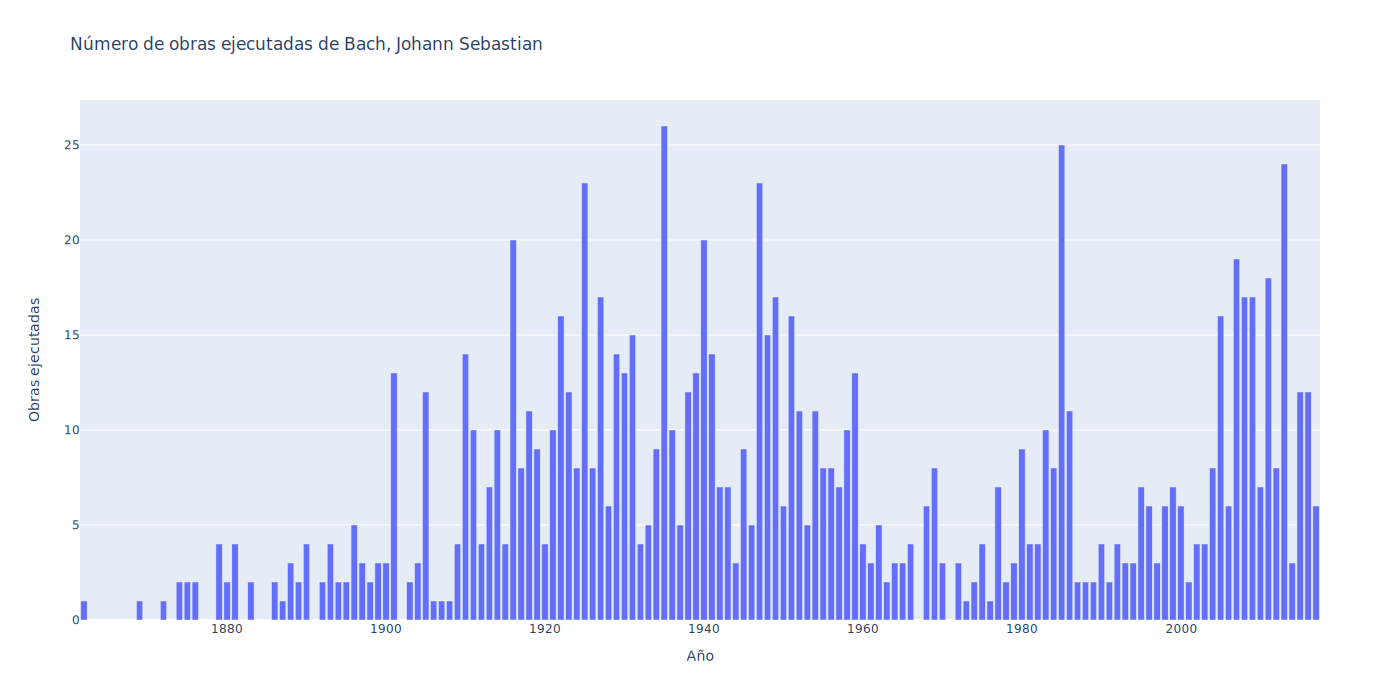

In [15]:
hist_comp('Bach,  Johann  Sebastian')

Cuando Mendelssohn redescubrió la música de Bach (aproximadamente en 1829) no se tocaba mucho, pero notamos que poco a poco fue subiendo su popularidad y su aceptación hasta llegar a auge aproximadamente en 1940

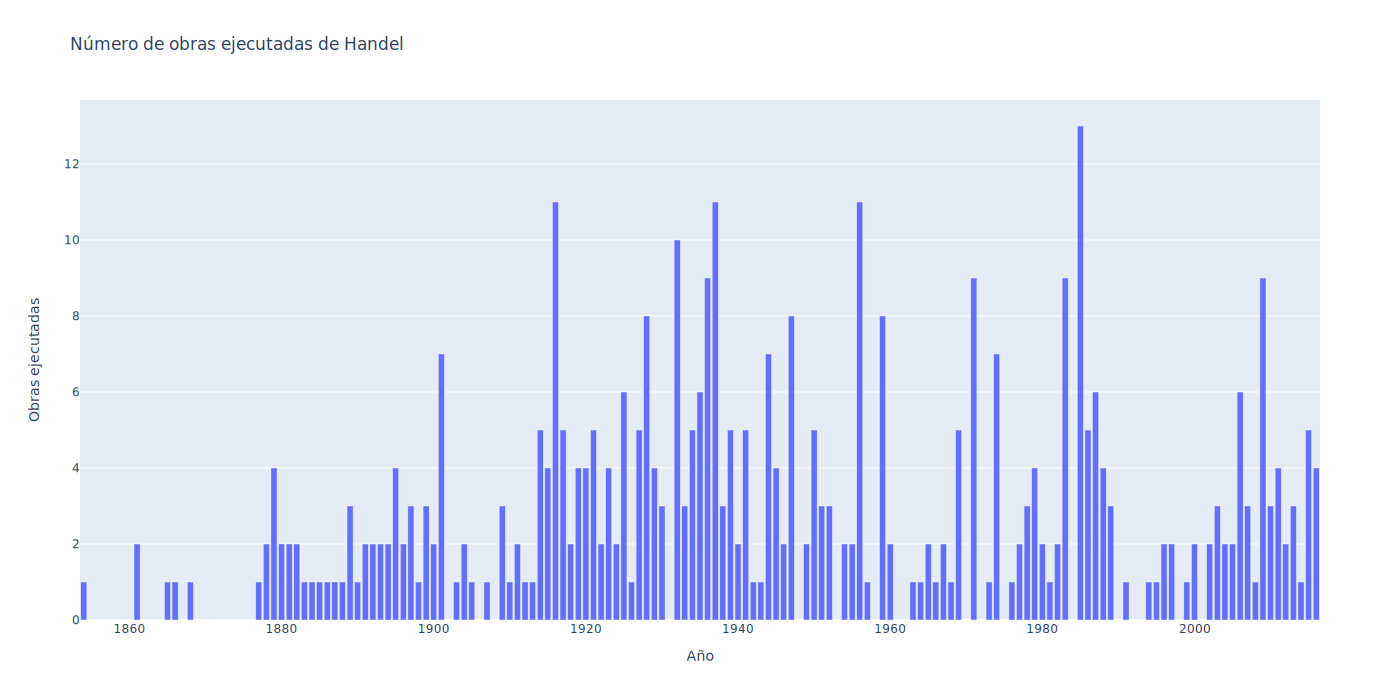

In [16]:
hist_comp('Handel')

Notamos que en la primera mitad del siglo XX hay un aumento muy pronunciado en el número de obras tocadas por dichos compositores. 
Vamos a proceder a ver cuales fueron los compositores más tocados de 1900 a 1950 y ver si predomino el periodo barroco

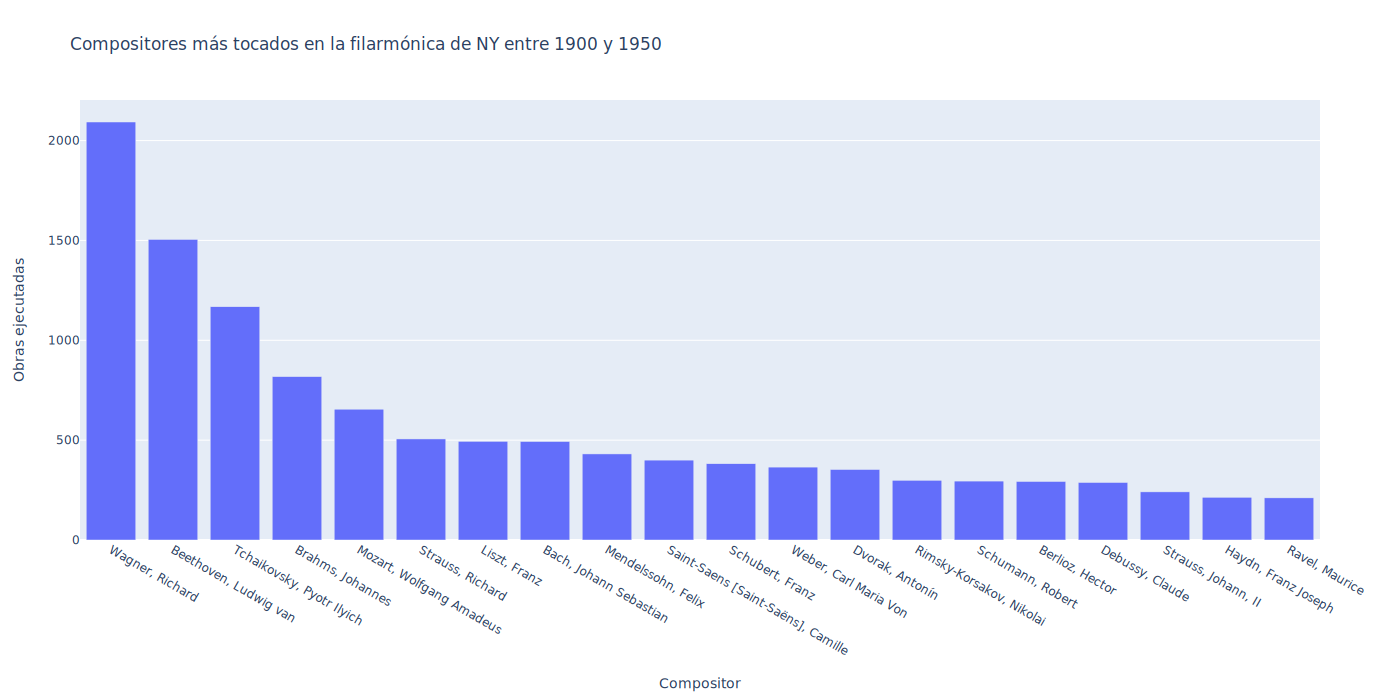

In [17]:
top_comp(1900, 1950)

Al ver el top notamos que la mayoría de los compositores que aparecen en él son correspondientes al periodo romántico, como por ejemplo Wagner, Beethoven, Tchaikovsky, Strauss, Lizt, mendelssohn, etc.
Por lo tanto, la hipótesis mencionada en la celda de arriba es falsa

Ahora vamos a proceder a análizar a los compositores del periodo clásico

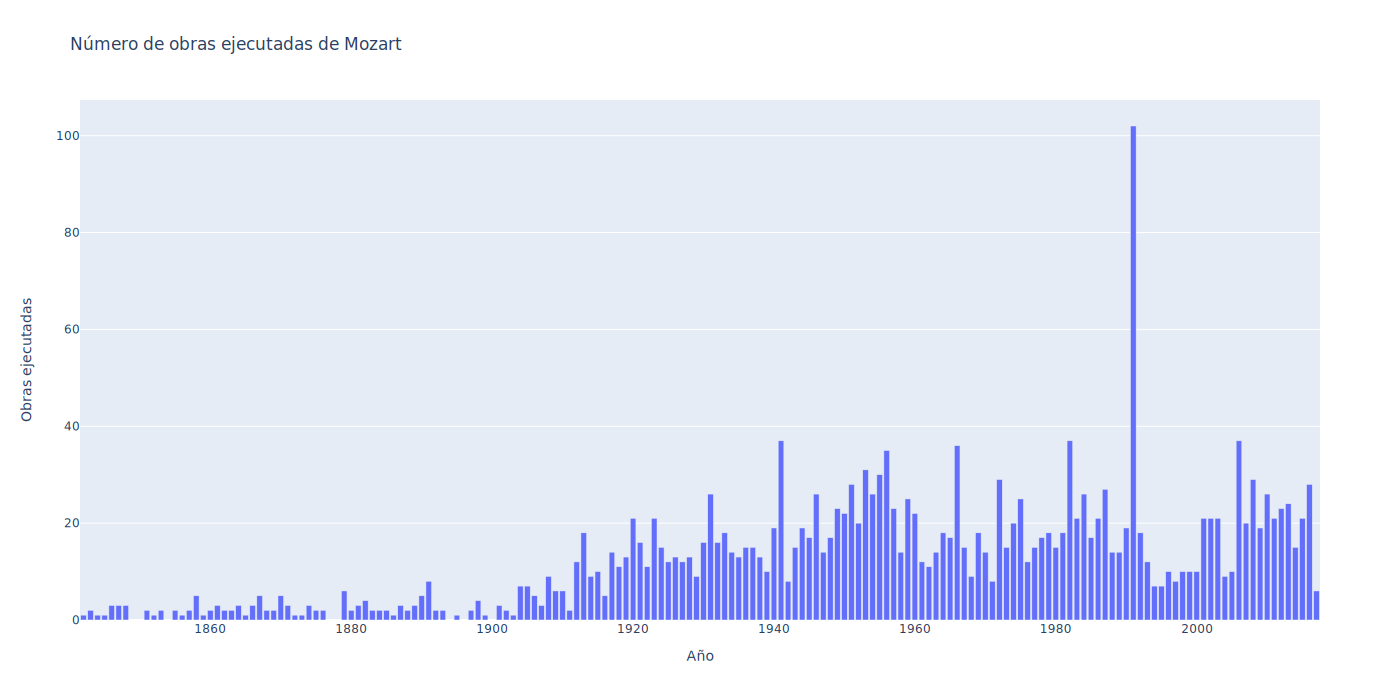

In [18]:
hist_comp('Mozart')

Podemos notar un claro aumento de obras tocadas de Mozart en el año 1991. Dicho fenómeno se puede explicar debido al 200 aniversario del fallecimiento de Mozart

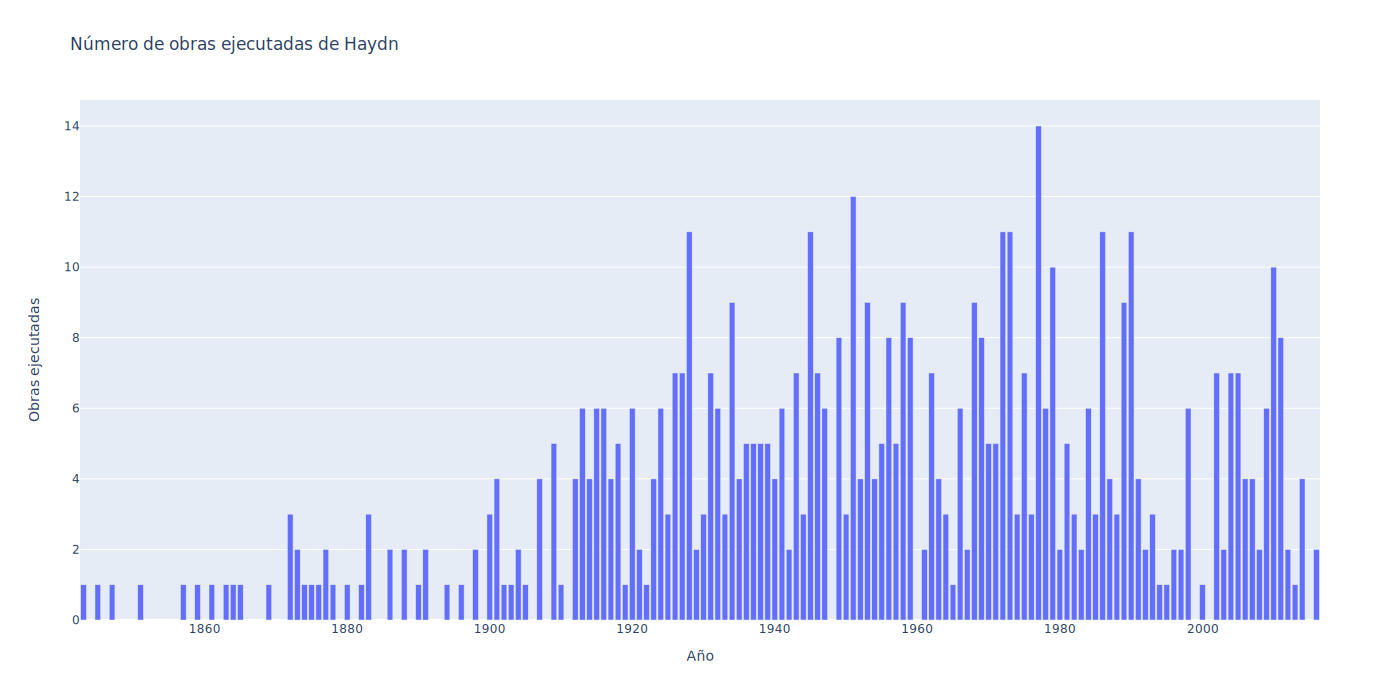

In [19]:
hist_comp('Haydn')

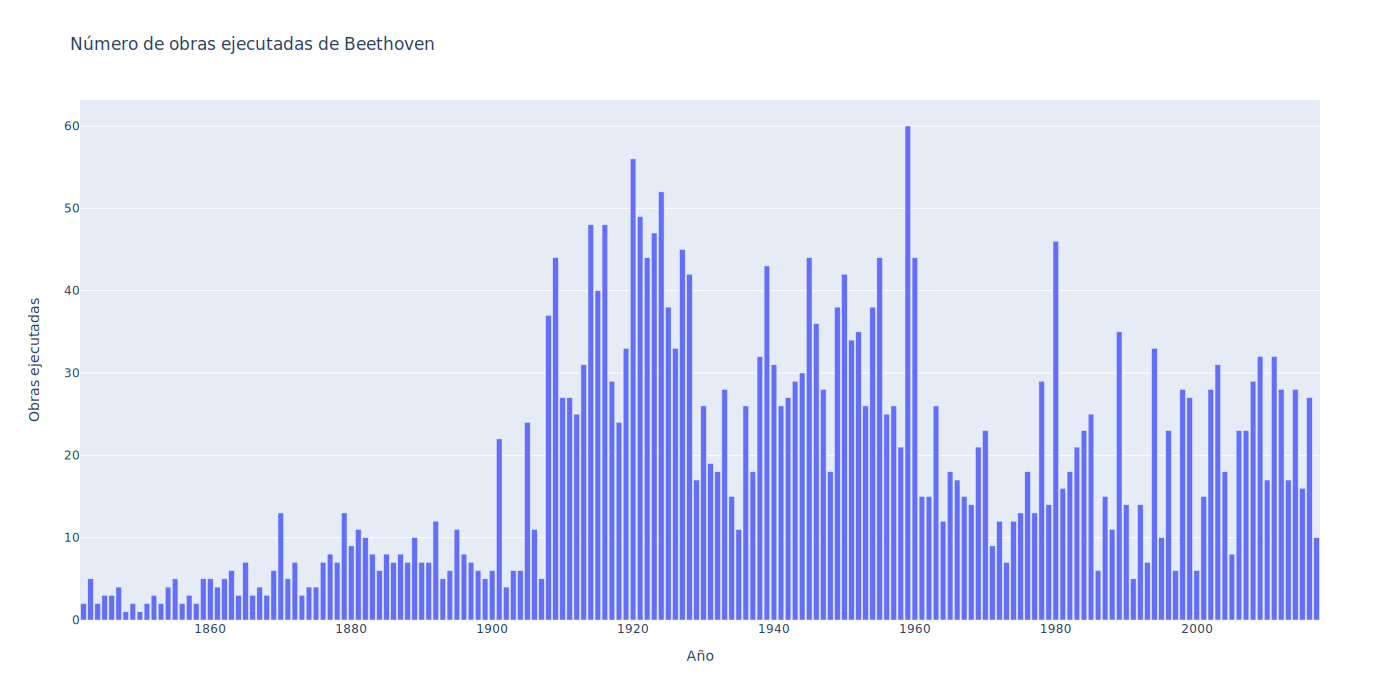

In [20]:
hist_comp('Beethoven')

Beethoven es considerado tanto compositor clásico como romántico. Muchas veces se dice que a partir de su tercer sinfonía (compuesta en 1805) es cuando empieza su periodo como romántico. 
Podemos ver que antes de 1900 Beethoven no era muy famoso en la filarmónica de NY, así que una pregunta sería ¿Son más tocadas sus obras clásicas o románticas?

Notamos que entre 1920 y 1940 hay un aumento de las obras de compositores clásicos. Vamos a ver ahora el top20 en dichos años

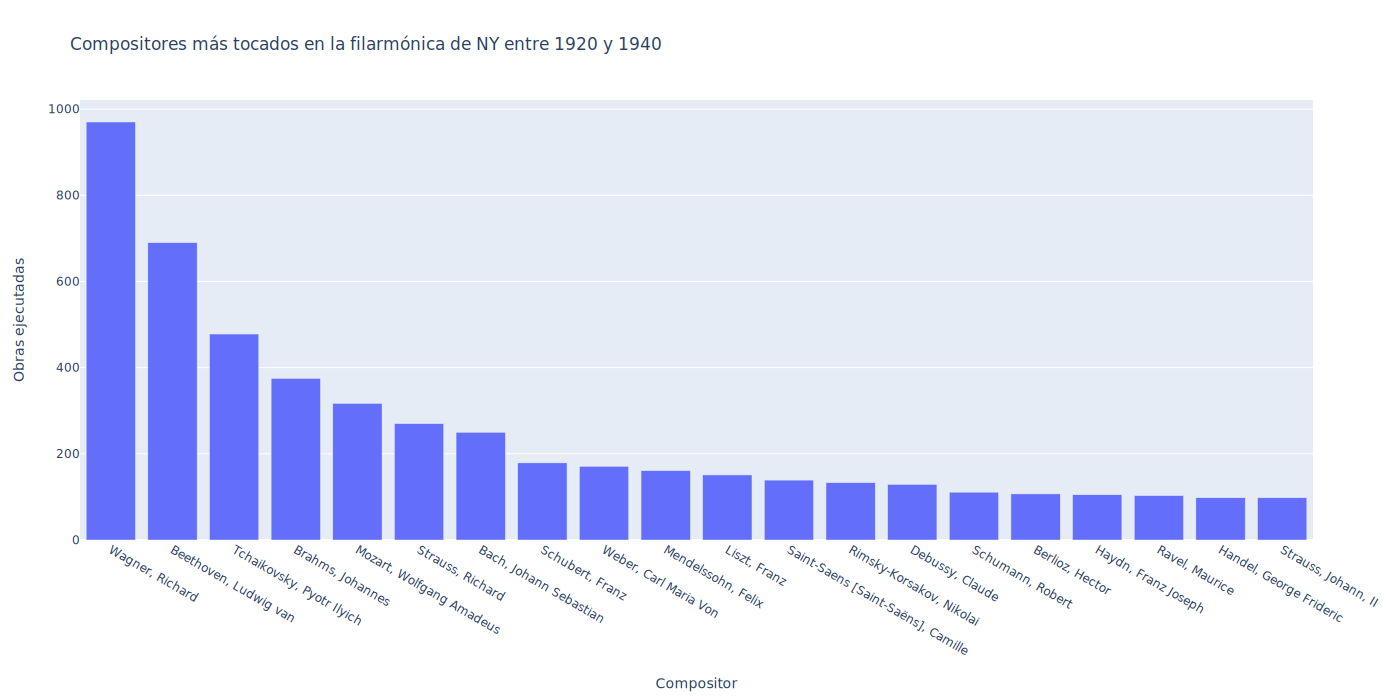

In [21]:
top_comp(1920, 1940)

A pesar de que predominaba el movimiento romántico, podemos ver que aun hay compositores tanto del barroco (Bach, Handel), como del romántico (Mozart, Haydn)

# Análisis del romanticismo

El romanticismo musical está comprendido entre los años 1820 hasta 1914 aproximadamente. Algunos de los compositores más famosos de dicha corriente son Tcahikovsky, Chopin, Liszt, Schumann, Schubert, etc.

Vemos que tan famosos algunos de los compositores romanticos

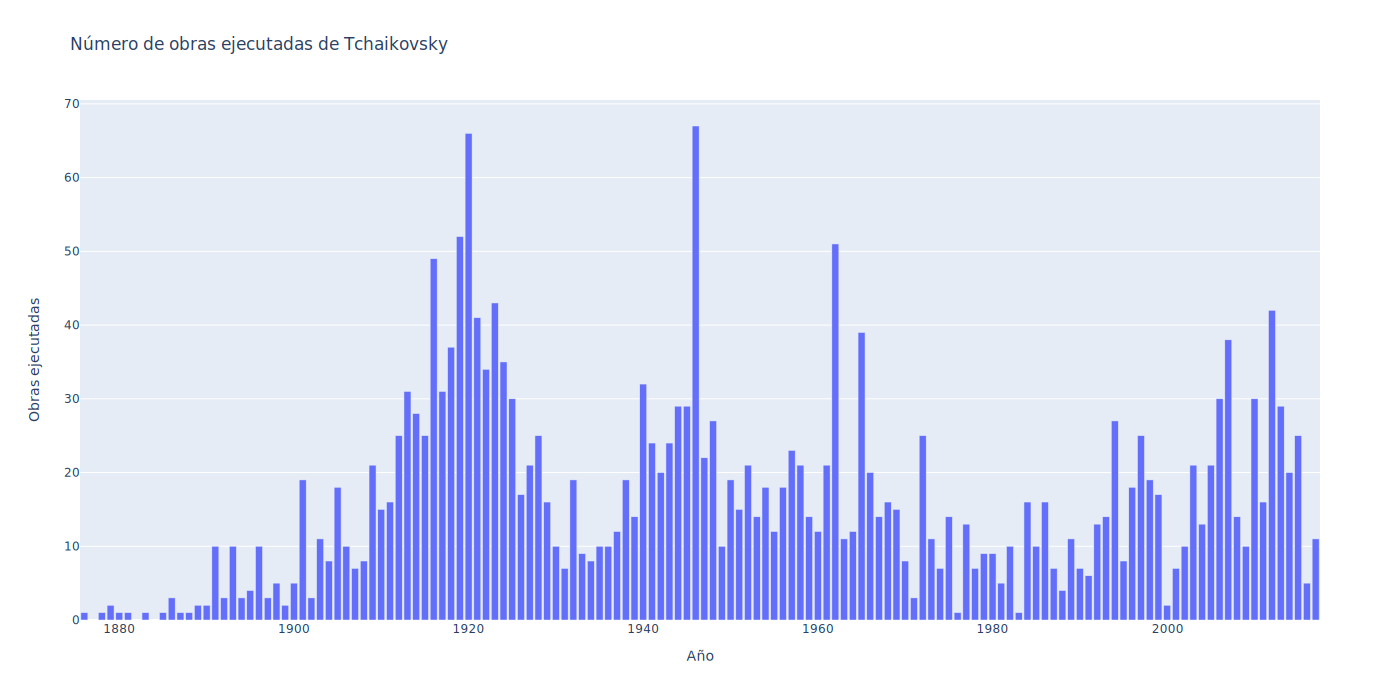

In [22]:
hist_comp('Tchaikovsky')

Tchaikovsky vivió entre 1840 y 1893. Tomando en cuenta dichos datos, podemos decir que no fue muy reconocido en su época comparado con las posteriores. 

De hecho fue más tocado en la primera mitad del siglo XX
Dada la popularidad de las sinfonías de Tchaikovsky, vamos a ver cuantas veces se tocó cada una

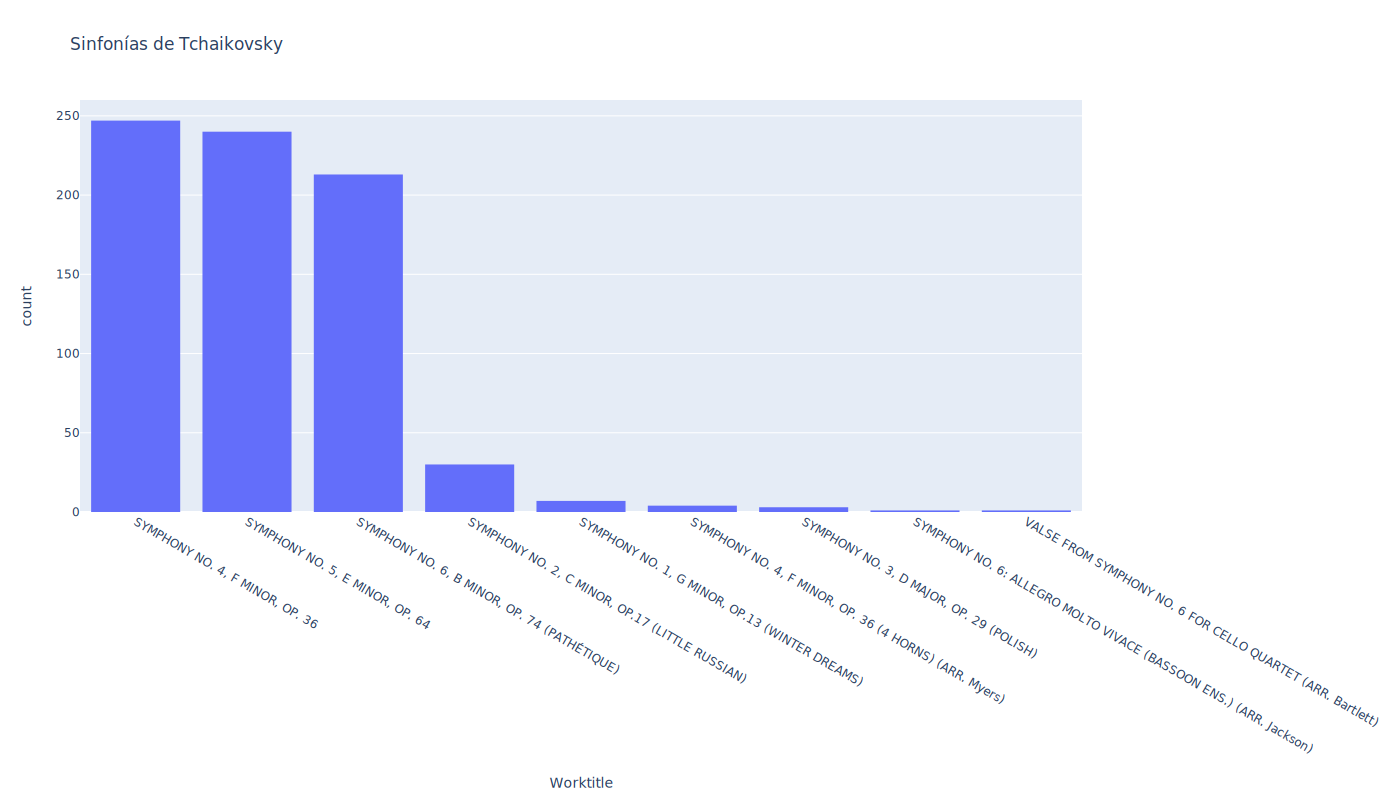

In [105]:
tcha = unicos[(unicos['Composername'].str.contains('Tchaikovsky') & (unicos['Worktitle'].str.contains('SYMPHONY NO')))]

fig = px.histogram(tcha, x = 'Worktitle', nbins = 20, title = 'Sinfonías de Tchaikovsky', height = 800, width = 1400)
fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer = 'svg')

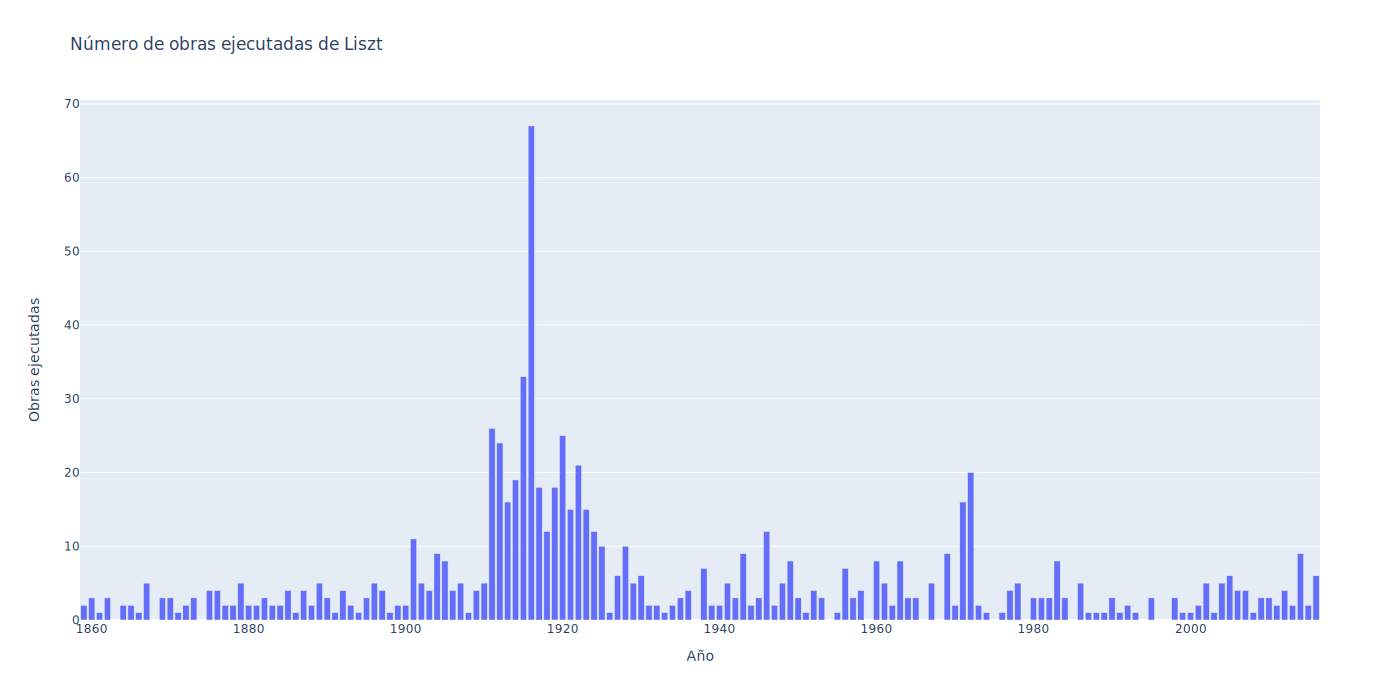

In [23]:
hist_comp('Liszt')

De igual manera, Liszt (1811, 1886) tampoco fue tan famoso en su época como en las posteriores

### Beethoven

In [24]:
#Procederemos a hacer el analisis de las obras mas populares de Beethoven

beethoven = unicos[unicos['Composername'].str.contains('Beethoven')]
beethoven['Worktitle'].value_counts().head(10)

SYMPHONY NO. 5 IN C MINOR, OP.67                   293
LEONORE OVERTURE NO. 3, OP. 72B                    249
SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)    214
SYMPHONY NO. 7 IN A MAJOR, OP.92                   213
CONCERTO, VIOLIN, D MAJOR, OP.61                   204
EGMONT, OP.84                                      189
CONCERTO, PIANO, NO. 5, E FLAT MAJOR, OP.73        157
SYMPHONY NO. 8 IN F MAJOR, OP.93                   147
CONCERTO, PIANO, NO. 4, G MAJOR, OP. 58            136
SYMPHONY NO. 9 IN D MINOR, OP.125                  128
Name: Worktitle, dtype: int64

Podemos ver ver que las obras más tocadas de Beethoven pertenecen al periodo romántico. De hecho la mayoría de ellas son sinfonías.
De lo anterior podemos deducir que Beethoven es más reconocido por sus obras románticas que por las clásicas

Como dato curioso sería interesante saber el orden de popularidad de las sinfonías del compositor.

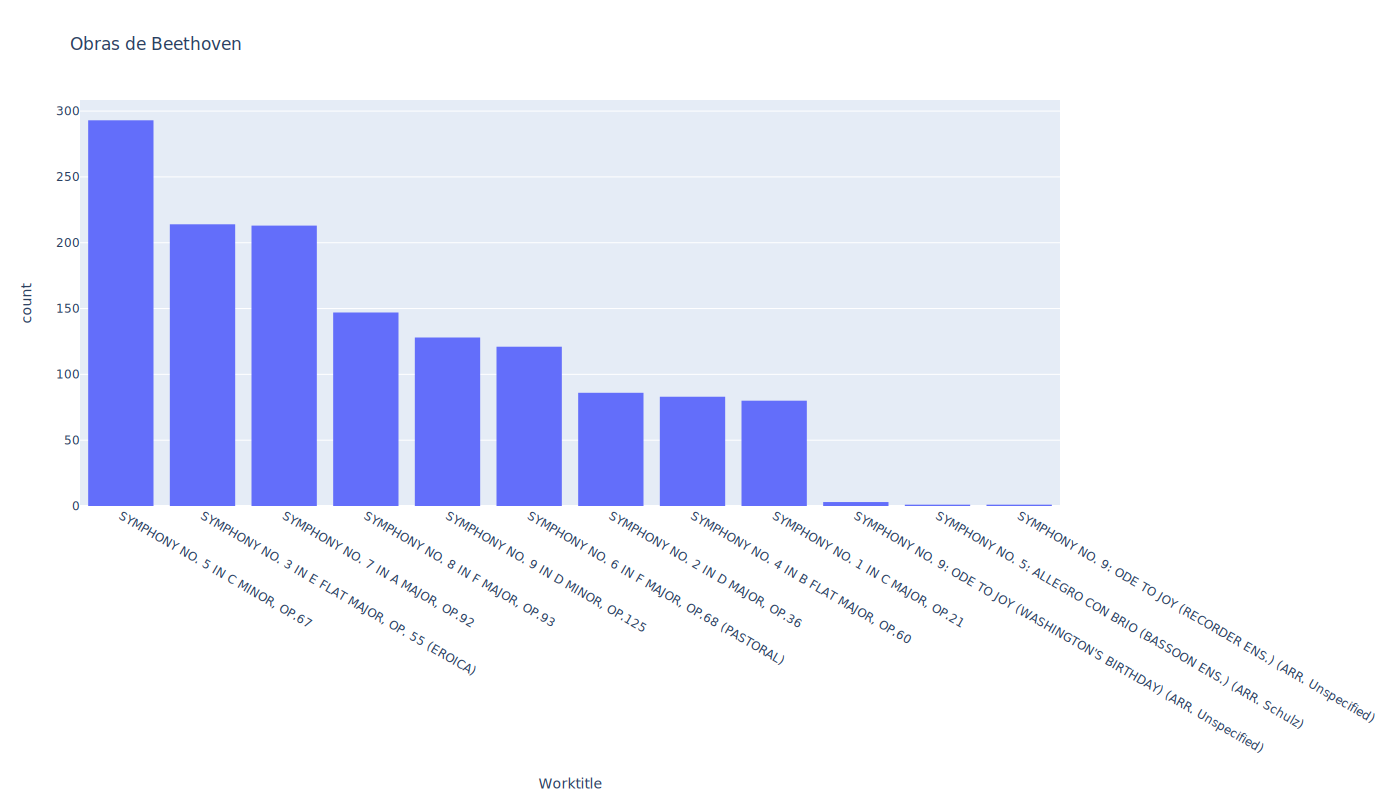

In [104]:
symphonies_btv = beethoven[beethoven['Worktitle'].str.contains('SYMPHONY')]

fig = px.histogram(symphonies_btv, x = 'Worktitle', title = 'Obras de Beethoven', height=800, width = 1400)
fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer = 'svg')

# Analizando los compositores contemporaneos

Uno de los compositores que más controversia crearon en su tiempo fue Igor Stravinsky ya que usó técnicas musicales fuera de lo común para su época como por ejemplo el dodecafonismo

## Analizando a Stravinsky

Primero vamos a ver la popularidad del famoso compositor Igor Stravinsky en la filarmónica de NY

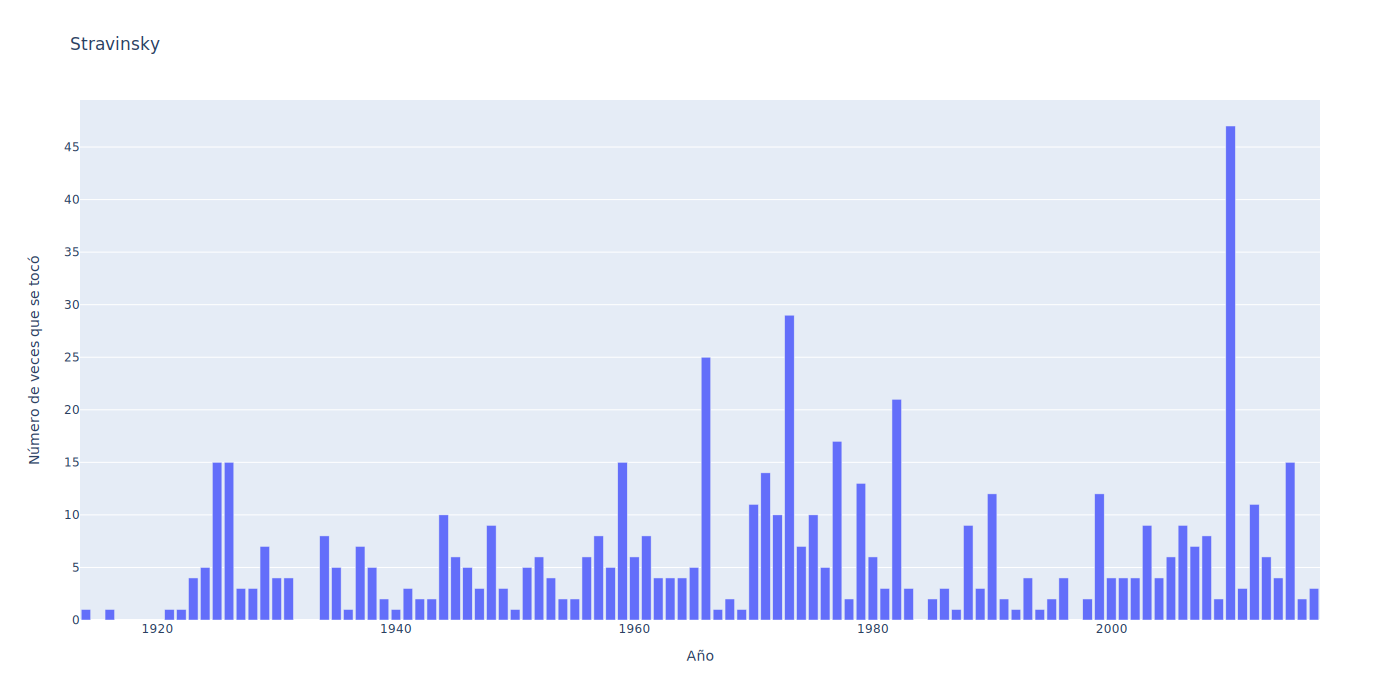

In [26]:
#Buscamos todas las veces que se toco una obra de Stravinsky
stravinsky = unicos[unicos['Composername'].str.contains('Stravinsky')]

#Agrupamos para poder contar y procedemos a graficar
stra_hist = stravinsky.groupby(stravinsky.index.year).count()
stra_hist.reset_index(inplace = True)

labels3 = {'Date' : 'Año', 'Location' : 'Número de veces que se tocó'}

fig = px.bar(stra_hist, x = 'Date', y = 'Location', title = 'Stravinsky', labels = labels3, width=1400, height=700)
fig.show(renderer = 'svg')

Podemos ver claramente que en el año 2010 hay un boom en la ejecucion de sus obras

El Pájaro de Fuego es posiblemente la obra que hizo que Stravinsky fuera mundialmente reconocido. Dicha obra es la primera de sus tres ballets que compuso, el segundo de ellos se llama Petrushka y el último (posiblemente el que causo más controversia) es La Consagración de la Primavera

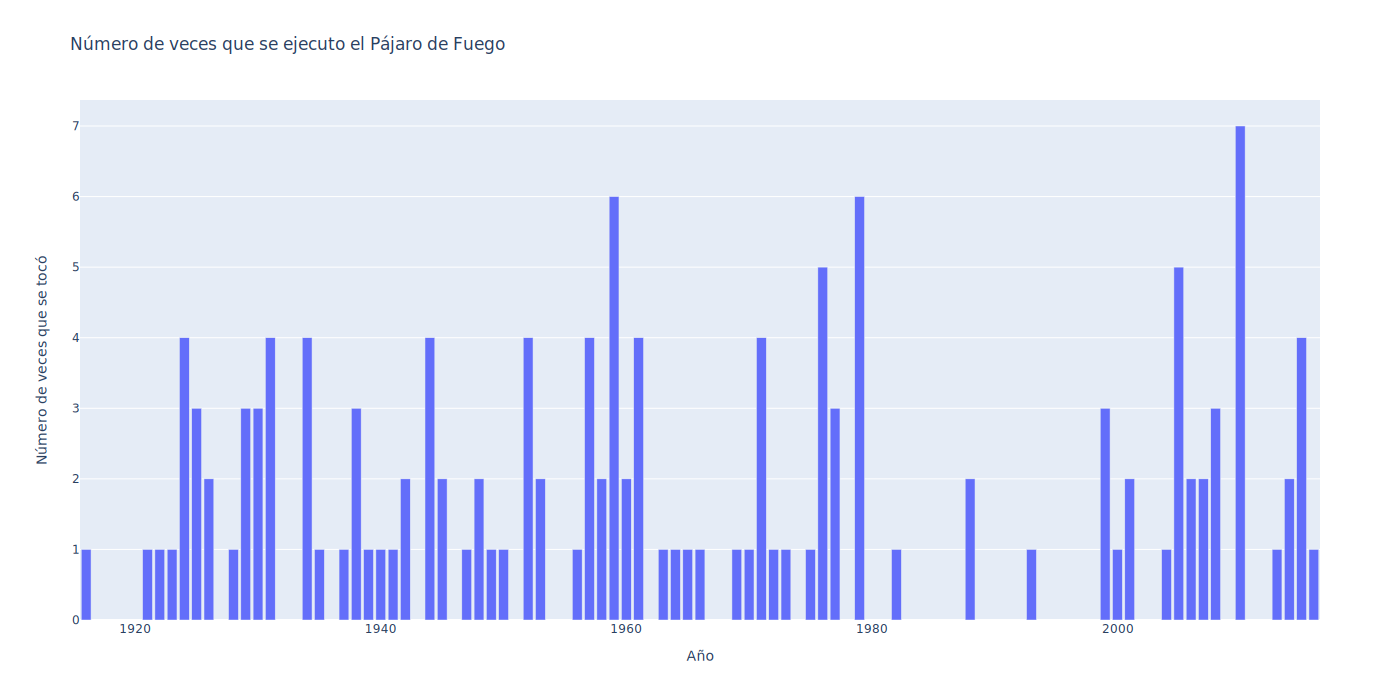

In [27]:
#Vamos a analizar la popularidad de su ballet "El Pájaro de Fuego"
firebird = unicos[unicos['Worktitle'].str.contains('FIREBIRD')]
firebird = firebird.groupby(firebird.index.year).count()
firebird.reset_index(inplace = True)

labels3 = {'Date' : 'Año', 'Location' : 'Número de veces que se tocó'}

fig = px.bar(firebird, x = 'Date', y = 'Location', title = 'Número de veces que se ejecuto el Pájaro de Fuego', labels = labels3, width=1400, height=700)
fig.show(renderer = 'svg')


De igual manera observamos que en el año 2010 es cuando se tocó más veces el ballet ya mencionado

Otro punto importante es que la primera vez que se ejecutó fue en el año 1916, 6 años después de su estreno en la Ópera de París. Esto es un poco extraño debido a que la orquesta de Nueva York tardó 6 años en tocar una obra la cual fue un exito inmediato en París. Lo esperado es que dicha composición haya sido ejecutada en Estados Unidos poco tiempo despues del estreno

e:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



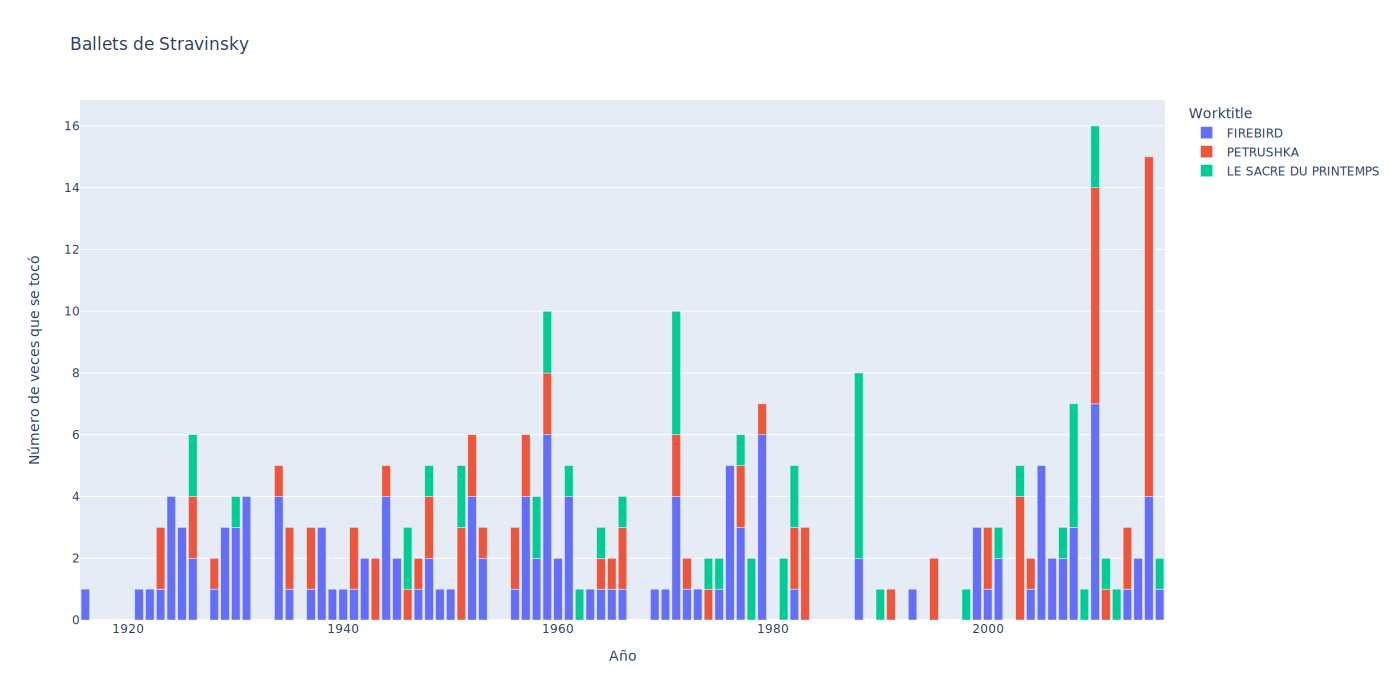

In [28]:
#Ahora vamos a analizar en conjunto sus tres ballets, los cuales son sus obras más conocidas

#Primero tomamos una lista con el nombre de los tres ballets
ballets_lista = ['FIREBIRD', 'PETRUSHKA ', 'SACRE DU PRINTEMPS']

#Vamos a reemplazar el nombre de los ballets
def reemplazar(variable):
    if variable.str.contains('FIREBIRD'):
        variable = 'FIREBIRD'
    elif variable.str.contains('PETRUSHKA'):
        variable = 'PETRUSHKA'
    elif variable.str.contains('SACRE DU PRINTEMPS'):
        variable = 'LE SACRE DU PRINTEMPS'

#Ahora buscamos las veces que se tocaron, ya sea acompañado de ballet, su version orquestal, piano, etc
ballets = unicos[unicos['Worktitle'].str.contains('|'.join(ballets_lista))]
#Reemplazamos el nombre de los ballets

ballets.loc[(ballets['Worktitle'].str.contains('FIREBIRD')), 'Worktitle'] = 'FIREBIRD'
ballets.loc[(ballets['Worktitle'].str.contains('PETRUSHKA')), 'Worktitle'] = 'PETRUSHKA'
ballets.loc[(ballets['Worktitle'].str.contains('SACRE DU PRINTEMPS')), 'Worktitle'] = 'LE SACRE DU PRINTEMPS'

#Agrupamos para poder contar
ballets = ballets.groupby([ballets.index.year, 'Worktitle']).count()
ballets.reset_index(inplace = True)

labels3 = {'Date' : 'Año', 'Location' : 'Número de veces que se tocó'}

fig = px.bar(ballets, x = 'Date', y = 'Location', color ='Worktitle', title = 'Ballets de Stravinsky', labels = labels3, width=1400, height=700)
fig.show(renderer = 'svg')

Claramente el ballet "El Pájaro de Fuego" es el más tocado. 

Además, al juntar los tres vemos que en el año 2010 hay un aumento drásctico de número de ejecuciones. Esto se puede explicar debido a que en dicho año se cumple en aniversario número 100 del estreno en París del Pájaro de Fuego

# Otros compositores contemporaneos

Ahora vamos a analizar en conjunto a algunos de los compositores más representativos de la música contemporanea
- Arnold Schoenberg
- George Gershwin
- Duke Ellington
- Dmitri Shostakovich
- John Cage
- Benjamin Britten
- Leonard Bernstein

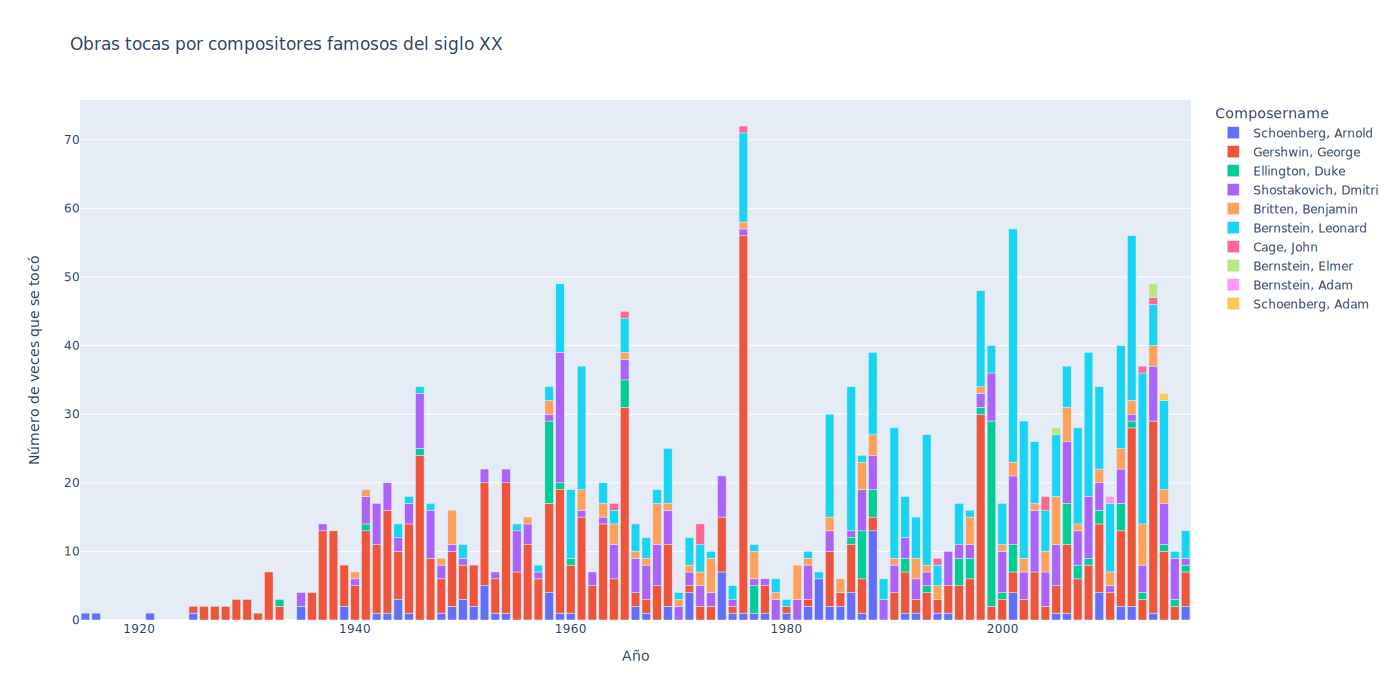

In [102]:
contemp = ['Schoenberg', 'Gershwin', 'Ellington', 'Shostakovich', 'Cage', 'Britten', 'Bernstein']

#Filtramos las obras de los compositores de la lista contemp
contempdf = unicos[unicos['Composername'].str.contains('|'.join(contemp))]

#Agrupamos por año y por compositor para poder contar
contempdf = contempdf.groupby([contempdf.index.year, 'Composername']).count()
contempdf.dropna(inplace = True)
contempdf.reset_index(inplace = True)

labels_contemp = {'Date' : 'Año', 'Location' : 'Número de veces que se tocó'}
title_contemp = 'Obras tocas por compositores famosos del siglo XX'

fig = px.bar(contempdf, x = 'Date', y = 'Location', color = 'Composername', title = title_contemp, labels = labels_contemp, width=1400, height=700)
fig.show(renderer = 'svg')

Podemos destacar que los compositores más tocados fueron George Gershwin y Leonard Bernstein, dejando muy por detrás a los demás.

Lo anterior es algo extraño ya considero que su trabajó debería de ser más reconocido, pues fueron grandes compositores.y además son autores de la corriente musical actual

# Compositores más tocados por director

Sería interesante saber si algunos directores tuvieron alguna tendencia a una corriente musical o a algún compositor en particular. Es esa la justificación por la cual vamos a crear una función que tome como parámetro el nombre de un director y regrese un histogramas de los compositores de las obras que más toco el director

In [29]:
def hist_director(director:str):
    '''
    Funcion que regresa una grafica de los compositores mas tocados por director
    Entrada: 
        director: Nombre del director
    Salida:
        Grafica de los compositores mas tocados por el director'''
    #Buscamos los conciertos en donde dirigio el director dado
    directordf = unicos[unicos['Conductorname'].str.contains(director)]

    #Agrupamos por compositor y contamos
    directordf = directordf.groupby('Composername').count()

    #Ordenamos y elegimos el top 20
    directordf.sort_values('Location', ascending = False, inplace = True)
    directordf.reset_index(inplace = True)
    directordf = directordf[:20]

    #Indicamos los labels, el titulo y procedemos a graficar
    labels2 = {'Composername' : 'Compositor', 'Location' : 'Obras ejecutadas'}
    title2 = 'Compositores más ejecutados por ' + director

    fig = px.bar(directordf, x = 'Composername', y = 'Location', title = title2, labels = labels2, width=1400, height=700)
    fig.show(renderer = 'svg')

Dos compositores de los cuales me es interesante saber es Bernstein y Mahler ya que ambas personas fueron tanto directores como compositores de la filarmónica de NY.

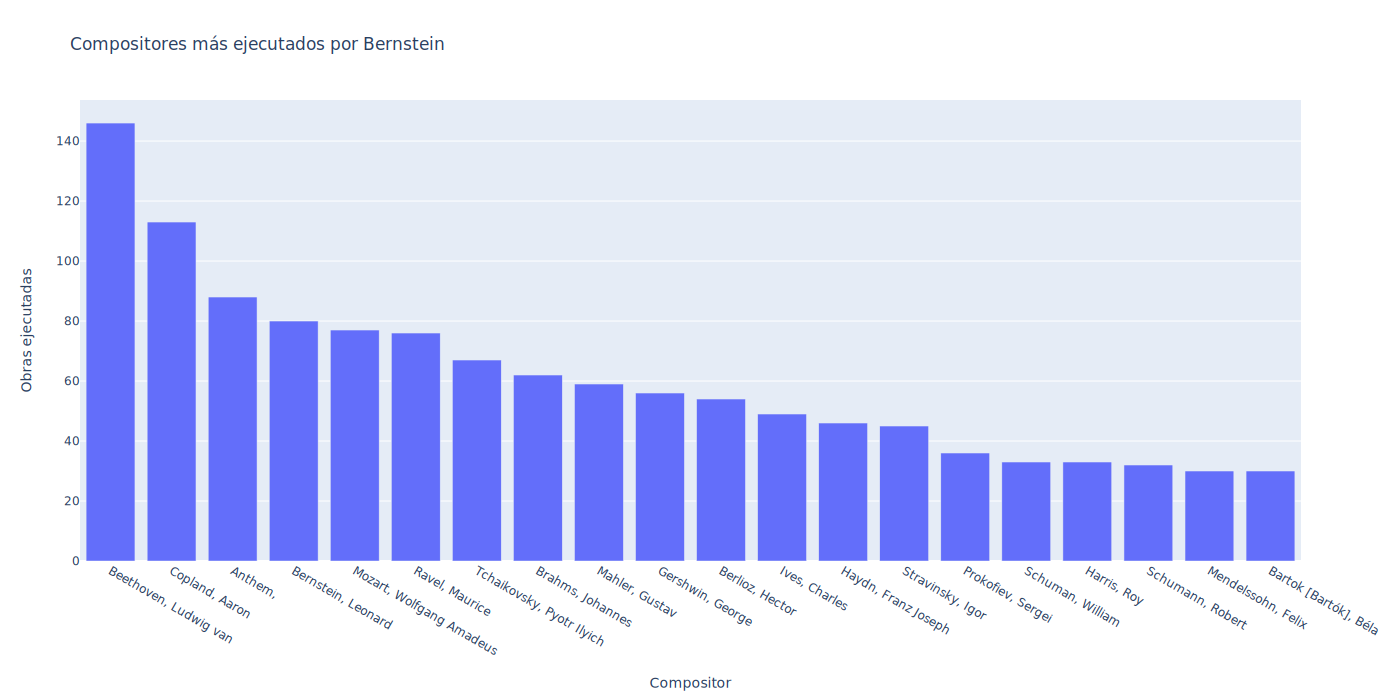

In [30]:
hist_director('Bernstein')

Notamos que en el top 20 de los compositores más tocados por Bernstein predominan las corrientes románticas (Beethoven, Tcahikovsky, Mahler) y contemporaneas (Stravinsky, Bartok, Copland), aunque también podemos ver un poco de clasicismo (Mozart, Haydn)

Un dato curioso es que Bernstein mismo está en el lugar número 4

### Bernstein y Mahler

Es sabido que Bernstein fue una persona clave en la música de Mahler ya que resucitó las obras del compositor románito, además de que lo admiraba mucho y las grabaciones que hizo Bernstein de las sinfonías de Mahler son consideradas como las mejores. 

Lo anterior se puede corroborar viendo que Mahler es el compositor número 9 más tocado por Bernstein

Ahora, a manera de tener una prueba más de lo anteriormente dicho, queremos ver el histograma de Mahler usando la función **hist_comp**

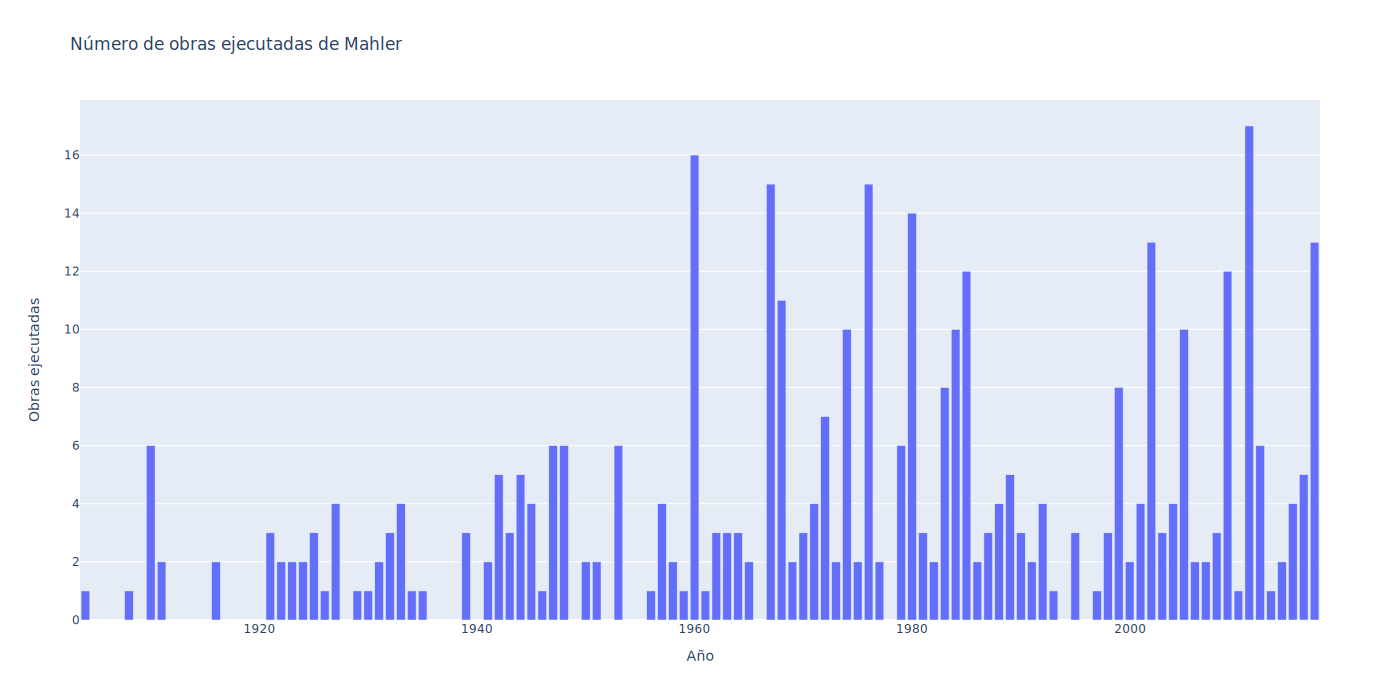

In [82]:
hist_comp('Mahler')

Bernstein fue director de la filarmónica de NY durante 1943-1989 y es claro que durante dicha época hubo un aumento en cuanto a la ejecución de las obras de Mahler. Es por ello que se dice que Bernstein renació su música

## Analizando los ultimos 20 años

Para terminar con éste análisis, es relevante saber qué ha estado pasando en las salas de concierto de música clásica. ¿Hay alguna tendencía de algunos compositores? ¿Han habido compositores nuevos que son frecuentes en los programas?

Vamos a consirerar los últimos 20 años del dataset para responder a las preguntas

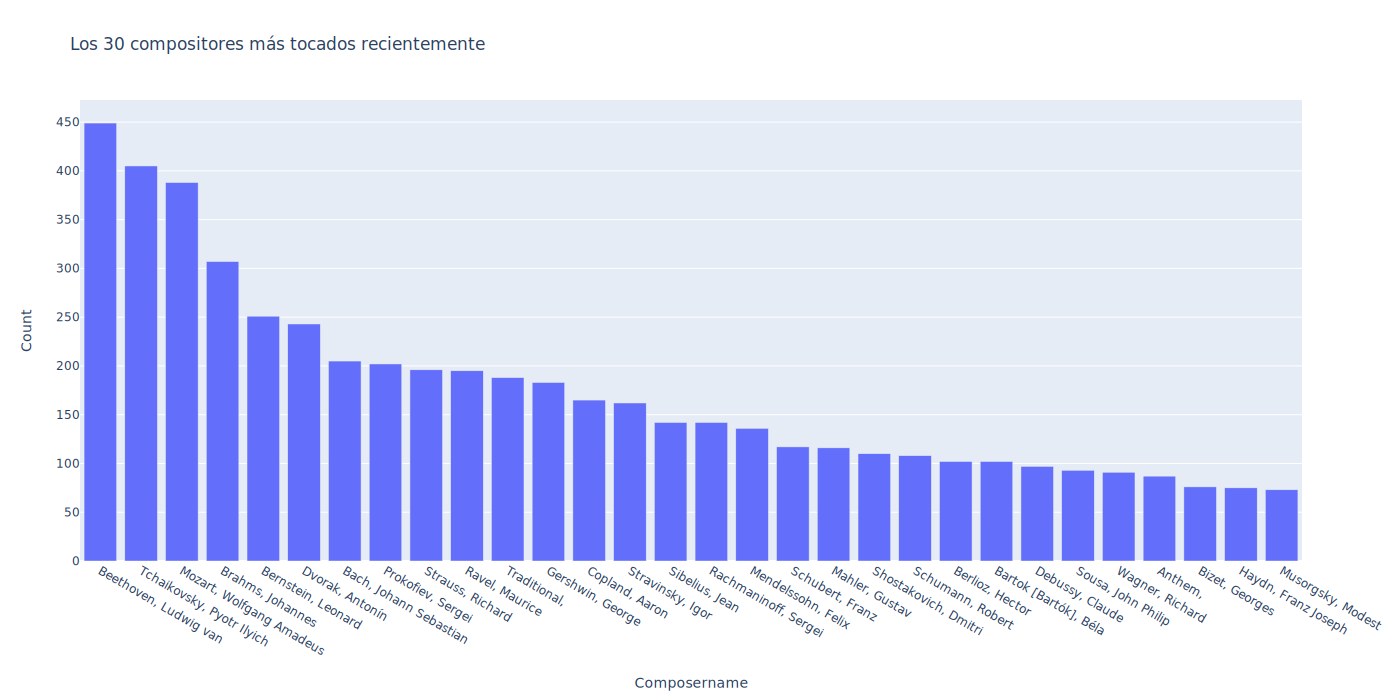

In [101]:
#Tomamos los ultimos 20 años
data20 = unicos.loc['1997':]

#Veamos los compositores más tocados recientemente
top20 = data20.groupby('Composername').agg({'Composername':'count'})
top20.columns = ['Count']
top20.reset_index(inplace = True)
top20.sort_values('Count', ascending = False, inplace = True)

fig = px.bar(top20[1:31], x = 'Composername', y = 'Count', title = 'Los 30 compositores más tocados recientemente', width=1400, height=700)
fig.show(renderer = 'svg')

Podemos ver que hay un cierto equilibrio en cuanto a periodos musicales debido a que se tocan tanto autores como del barroco, clasicismo, romanticismo y contemporaneos.
Un detalle a notar es que el unico compositor barroco es Bach pero se encuentra en un puesto alto

Lo anterior dicho es algo bueno ya que, por ejemplo, habíamos visto que en la primera mitad del siglo XX la orquesta se dedicó a tocar casi unicamente compositores románticos, dejando atrás a las demás corrientes musicales.

Por otro lado, no vemos algún compositor nuevo en la lista. Veamos hasta que número del top tenemos que bajar para encontrar a un compositor que siga vivo

In [94]:
top20[30:40]

,Composername,Count
1621,"Musorgsky, Modest",73
121,"Barber, Samuel",64
2483,"Williams, John",64
1371,"Liszt, Franz",64
1912,"Rimsky-Korsakov, Nikolai",61
1993,"Saint-Saens [Saint-Saëns], Camille",60
658,"Ellington, Duke",56
419,"Chopin, Frédéric",55
8,"Adams, John",54
979,"Handel, George Frideric",54


En el número 33 podemos ver a John Williams, más reconocido por ser compositor de bandas sonoras

In [95]:
top20[40:50]

,Composername,Count
1926,"Rodgers, Richard",53
1959,"Rossini, Gioachino",50
1799,"Pollack, Lew",50
2167,"Sondheim, Stephen",49
317,"Bruckner, Anton",48
301,"Britten, Benjamin",47
2232,"Strauss, Johann, II",45
655,"Elgar, Sir Edward",45
578,"Discussion,",45
2387,"Verdi, Giuseppe",45


En el lugar número 44 encontramos a Stephen Sondheim quien desafortunadamente falleció en el 2021, pero lo metemos dentro de la lista ya que el dataset tiene información hasta 2017

In [99]:
top20[50:60]

,Composername,Count
926,"Grieg, Edvard",43
1118,"Ives, Charles",40
2403,"Vivaldi, Antonio",38
1963,"Rouse, Christopher",37
695,"Falla, Manuel de",37
1363,"Lindberg, Magnus",36
1998,"Salonen, Esa-Pekka",34
2449,"Weill, Kurt",33
1888,"Respighi, Ottorino",33
863,"Glinka, Mikhail",32


En el puesto 54 está Chistopher Rouse quien falleció igualmente en el 2021 pero lo dejamos en la lista por la misma razón que se mencionó anteriormente

En el lugar 56 está Magnus Lindberg y en el 57 Esa-Pekka Salonen 

A pesar de que sí hay compositores contemporaneos a nosotros siendo famosos en las salas de conciertos, no son muchos, es decir que trsitemente no hay mucha música actual siendo tocada. 
Esperemos que lo anterior se deba al fenómeno ya visto en este breve análisis, es decir, que en un par de años en los programas musicales van a predominar compositores de ésta época